In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = (X[:,0] + X[:,1] == 1).astype(int)

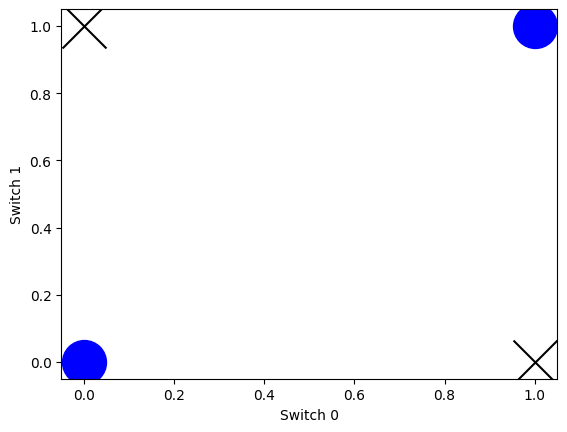

In [26]:
for i in [0, 1]:
    plt.scatter(X[y == i][:,0], X[y == i][:,1], marker=['o', 'x'][i], color=['b', 'k'][i],
    s=1000)
    plt.xlabel('Switch 0')
    plt.ylabel('Switch 1')

In [27]:
np.random.seed(0)
y_simple = np.random.binomial(1, .5, size=10)
X_simple = np.array([[e] for e in y_simple])

In [28]:
count = (X_simple[:,0][y_simple == 0] == 0).sum()
print(f"In {count} instances, both the switch and the light are off")

In 3 instances, both the switch and the light are off


In [29]:
count = (X_simple[:,0][y_simple == 1] == 1).sum()
print(f"In {count} instances, both the switch and the light are on")

In 7 instances, both the switch and the light are on


In [30]:
def get_co_occurrence(X, y, col=0):
    co_occurrence = []
    for i in [0, 1]:
        counts = [(X[:,col][y == i] == j).sum() for j in [0, 1]]
        co_occurrence.append(counts)
    return np.array(co_occurrence)
M = get_co_occurrence(X_simple, y_simple)
assert M[0][0] == 3
assert M[1][1] == 7
print(M)

[[3 0]
 [0 7]]


In [31]:
X_simple

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [32]:
X_simple = np.vstack([X_simple, [1]])

In [33]:
y_simple

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [34]:
y_simple = np.hstack([y_simple, [0]])

In [35]:
M = get_co_occurrence(X_simple, y_simple)

In [36]:
M

array([[3, 1],
       [0, 7]])

In [37]:
bulb_probs = M[0] / M[0].sum()
print("When the switch is set to 0, the bulb state probabilities are:")
print(bulb_probs)

When the switch is set to 0, the bulb state probabilities are:
[0.75 0.25]


In [38]:
bulb_probs = M[1] / M[1].sum()
print("When the switch is set to 1, the bulb state probabilities are:")
print(bulb_probs)
prediction = ['off', 'on'][bulb_probs.argmax()]
accuracy = bulb_probs.max()
print(f"\nWe assume the bulb is {prediction} with "
f"{100 * accuracy:.0f}% accuracy")

When the switch is set to 1, the bulb state probabilities are:
[0. 1.]

We assume the bulb is on with 100% accuracy


In [39]:
M.sum(axis=1)

array([4, 7])

In [40]:
accuracies = [.75, 1.]
total_accuracy = np.average(accuracies, weights=M.sum(axis=1))

In [41]:
total_accuracy

0.9090909090909091

In [50]:
def train_if_else(X, y, feature_col=0, feature_name='feature'):
    M = get_co_occurrence(X, y, col=feature_col)
    probs0, probs1 = [M[i]/M[i].sum() for i in [0, 1]]
    if_else = f"""
    if {feature_name} == 0:
        prediction = {probs0.argmax()}
    else:
        prediction = {probs1.argmax()}
    """.strip()
    if probs0.argmax() == probs1.argmax():
        if_else = f"prediction = {probs0.argmax()}"
    accuracies = [probs0.max(), probs1.max()]
    total_accuracy = np.average(accuracies, weights=M.sum(axis=1))
    return if_else, total_accuracy

In [51]:
if_else, accuracy = train_if_else(X_simple, y_simple, feature_name='switch')
print(if_else)
print(f"\nThis statement is {100 * accuracy:.0f}% accurate.")

if switch == 0:
        prediction = 0
    else:
        prediction = 1

This statement is 91% accurate.


In [52]:
feature_names = [f"switch{i}" for i in range(2)]

In [53]:
for i, name in enumerate(feature_names):
    _, accuracy = train_if_else(X, y, feature_col=i, feature_name=name)
    print(f"The model trained on {name} is {100 * accuracy:.0f}% " "accurate.")

The model trained on switch0 is 50% accurate.
The model trained on switch1 is 50% accurate.
